In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import classification_report
import random
import numpy as np
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing import sequence
from sklearn import svm, datasets
# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

# Using 15 Best Features

In [ ]:
df_train= pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
df_train.head()

In [ ]:
df_test= pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
df_test.head()

In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:
df_train.shape

In [ ]:
df_test.shape

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

In [ ]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])
        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs 

In [ ]:
pie_plot(df_train, ['category', 'subcategory'], 1, 2)

In [ ]:
pie_plot(df_test, ['category', 'subcategory'], 1, 2)

In [ ]:
attack_vs_protocol = pd.crosstab(df_train.category, df_train.subcategory)
attack_vs_protocol

In [ ]:
attack_vs_protocol_test = pd.crosstab(df_test.category, df_test.subcategory)
attack_vs_protocol_test

In [ ]:
http_attacks = attack_vs_protocol.HTTP
tcp_attacks = attack_vs_protocol.TCP
udp_attacks = attack_vs_protocol.UDP
os_fingerprint_attacks = attack_vs_protocol.OS_Fingerprint

# create the charts
bake_pies([http_attacks, tcp_attacks, udp_attacks,os_fingerprint_attacks],['http','tcp','udp','os_fingerprint'])
plt.show()

In [ ]:
http_attacks = attack_vs_protocol_test.HTTP
tcp_attacks = attack_vs_protocol_test.TCP
udp_attacks = attack_vs_protocol_test.UDP
os_fingerprint_attacks = attack_vs_protocol_test.OS_Fingerprint
serv_fingerprint_attacks = attack_vs_protocol_test.Service_Scan

# create the charts
bake_pies([http_attacks, tcp_attacks, udp_attacks,os_fingerprint_attacks,serv_fingerprint_attacks],['http','tcp','udp','os_fingerprint','Service_Scan'])
plt.show()

In [ ]:
corr = df_train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
corr = df_train['mean'].corr(df_train['max'])
corr

In [ ]:
df_train['mean'].value_counts()

In [ ]:
df_train['max'].value_counts()

In [ ]:
df_train.drop('max',axis = 1,inplace=True)

In [ ]:
corr = df_test.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
df_test.drop('max',axis = 1,inplace=True)

In [ ]:
print(df_train.shape)
print(df_test.shape)

In [ ]:
df_train['attack'].value_counts()

In [ ]:
sns.countplot(df_train['attack'] , palette = 'Set2')

In [ ]:
df_train.drop('category',axis = 1,inplace = True)
df_train.drop('subcategory',axis = 1,inplace = True)
df_test.drop('category',axis = 1,inplace = True)
df_test.drop('subcategory',axis = 1,inplace = True)

In [ ]:
clm=df_train.select_dtypes(['object']).columns.tolist()

In [ ]:
clm

# Data Preprocessing 

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

In [ ]:
df_train.head()

Test Data Normalisation

In [ ]:
# label col
y_test = df_test.attack

# independant variable
x_test = df_test.drop(columns = ["attack"] )

In [ ]:
x_test = x_test.apply(lambda x:(x - x.min())/(x.max() - x.min() ), axis= 0 )

In [ ]:
x_test.head()

Traing Data Normalisation

In [ ]:
# label col
y_train= df_train.attack

# independant variable
x_train= df_train.drop(columns = ["attack"] ) 

In [ ]:
x_train = x_train.apply(lambda x:(x - x.min())/(x.max() - x.min() ), axis= 0 )

In [ ]:
x_train.head()

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
def report_heatmap(y_pred):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
models = {}
# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(multi_class='multinomial')

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines linear'] = LinearSVC()
models['Support Vector Machines plonomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Overall Accuracy: 99.99%
--------------------------
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.96      0.84      0.89    733705
weighted avg       1.00      1.00      1.00    733705



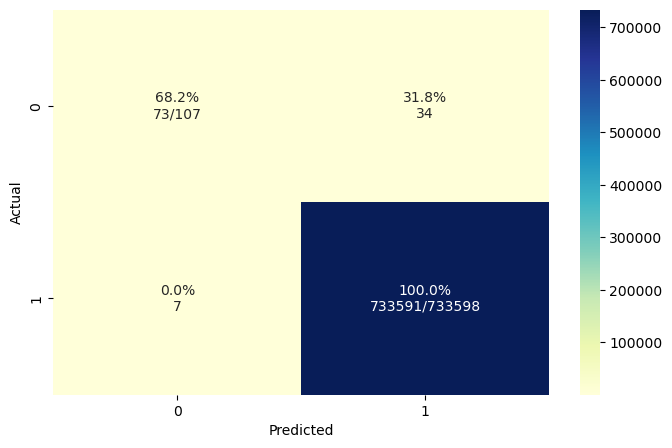

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train,y_train)
# Predict on the test set and calculate accuracy
y_pred=lr.predict(x_test)

# display report
report_heatmap(y_pred)

Overall Accuracy: 100.00%
--------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.93      0.98      0.96    733705
weighted avg       1.00      1.00      1.00    733705



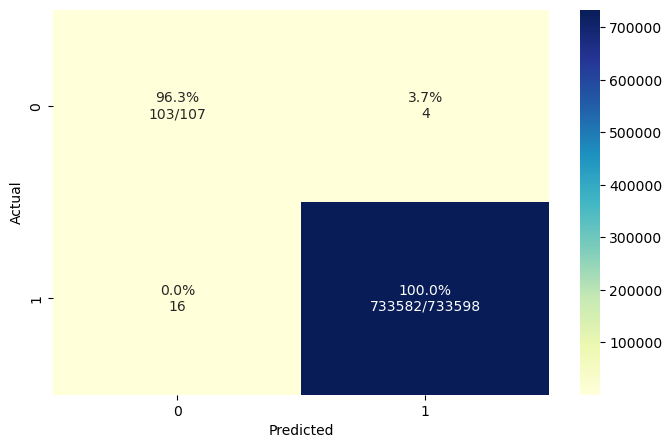

In [47]:
svc_rbf =  SVC(C=100.0)
svc_rbf.fit(x_train,y_train)
# Predict on the test set and calculate accuracy
y_pred=svc_rbf.predict(x_test)

# display report
report_heatmap(y_pred)

Cross Validation Score

In [41]:
from sklearn.model_selection import KFold, cross_val_score
svc_rbf =  SVC(C=100.0)
svc_rbf.fit(x_train,y_train)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(svc_rbf, x_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99999319 0.99997956 0.99997274 0.99997274 0.99998637]
Average CV Score:  0.9999809187616275
Number of CV Scores used in Average:  5


Overall Accuracy: 99.99%
--------------------------
              precision    recall  f1-score   support

           0       0.71      0.99      0.82       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.85      1.00      0.91    733705
weighted avg       1.00      1.00      1.00    733705



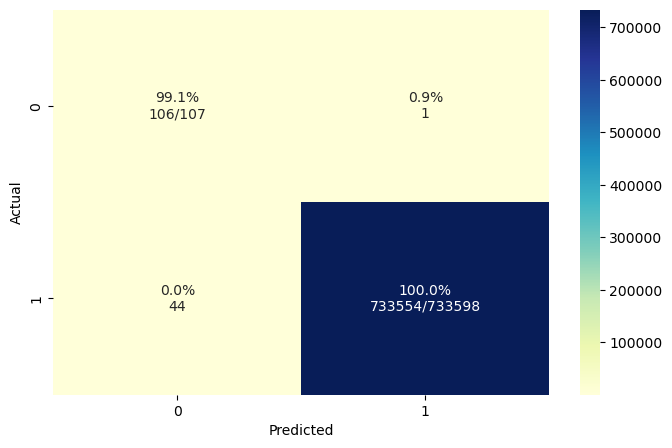

In [48]:
nb = GaussianNB()
nb.fit(x_train,y_train)
# Predict on the test set and calculate accuracy
y_pred=nb.predict(x_test)

# display report
report_heatmap(y_pred)

In [42]:
nb = GaussianNB()
nb.fit(x_train,y_train)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(nb, x_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99995911 0.99995911 0.9999523  0.99993867 0.99993867]
Average CV Score:  0.9999495710128731
Number of CV Scores used in Average:  5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Overall Accuracy: 100.00%
--------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.95      0.93      0.94    733705
weighted avg       1.00      1.00      1.00    733705



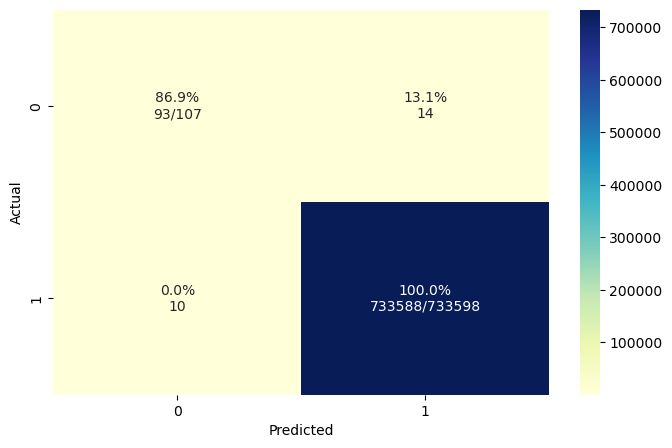

In [49]:
knn= KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
# Predict on the test set and calculate accuracy
y_pred=knn.predict(x_test)

# display report
report_heatmap(y_pred)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.90)
x_reduced = pca.fit_transform(x_train)
print("number of original features are {} and the reduced features are {}".format(x_train.shape[1],x_reduced.shape[1]))

number of original features are 15 and the reduced features are 6


In [53]:
train_pca = pca.fit_transform(x_train)
test_pca = pca.transform(x_test)

Overall Accuracy: 99.99%
--------------------------
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.93      0.80      0.85    733705
weighted avg       1.00      1.00      1.00    733705



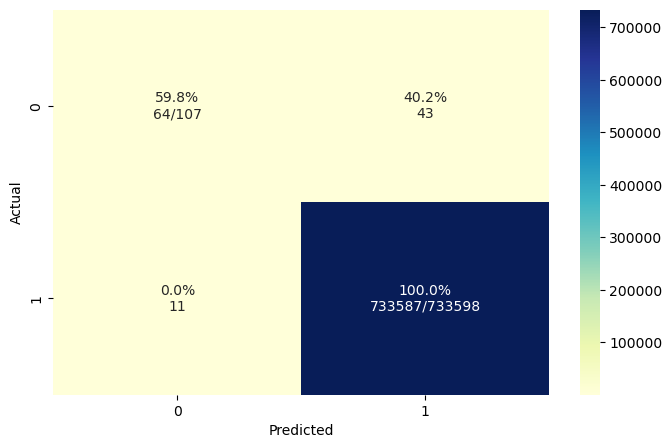

In [54]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=10).fit(train_pca, y_train)
Y_pred_rbf =rbf_svc.predict(test_pca)
report_heatmap(Y_pred_rbf)

In [40]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.7.1


In [44]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


Overall Accuracy: 96.90%
--------------------------
              precision    recall  f1-score   support

           0       0.00      0.91      0.01       107
           1       1.00      0.97      0.98    733598

    accuracy                           0.97    733705
   macro avg       0.50      0.94      0.50    733705
weighted avg       1.00      0.97      0.98    733705



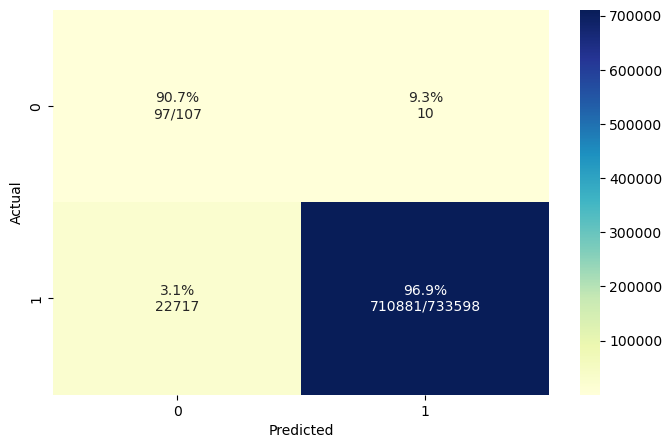

In [45]:
Y_pred_xgb =xgbc.predict(x_test)
report_heatmap(Y_pred_xgb)